# Use Case
#### Use Case Summary
#### Objective Statement:
* To find out how the highest and lowest scores obtained by students, as well as the longest and shortest hours of study done by students.
* To know relation between number of study hours and marks of the student.
* To predict student scores using machine learning linear regression.
* To get MAPE, R-Squared, MAE, and RMSE of simplel linear model.
* To deploy the model using MLflow.

#### Challenges:
* Small size of dataset

#### Methodology / Analytic Technique:
* Exploratory analysis (Graph Analysis)
* Simple Linear Model
* Model tracking using MLflow
* Deployment

#### Business Benefit:
* Know how to increase student grades.

#### Expected Outcome:
* Find out how the highest and lowest scores obtained by students, as well as the longest and shortest hours of study done by students
* Know the relation between number of study hours and marks of the student.
* Predict student scores using machine learning linear regression.
* Know the MAPE, R-Squared, MAE, and RMSE of the model.
* The model is deployed using MLflow.



# Business Understanding
Scoring in education is the process of applying standardized measurements for varying degrees of achievement in one course.</br>
This case requires data-driven answers to the following questions:
* Which are the highest and lowest scores obtained by students, as well as the longest and shortest hours of study done by students?
* How is relation between number of study hours and marks of the student?
* How is the prediction of student scores using machine learning linear regression?
* How much is the MAPE, R-Squared, MAE, and RMSE of the model?
* How to deploy the model using mlflow?


# Data Understanding
* Data of the number of hours student studied and the marks they got.
* The dataset has 2 columns and 25 rows.

#### Data Source
* Source Data: https://www.kaggle.com/code/turhancankargin/simple-linear-regression/data 

#### Data Dictionary 
* Hours 	: Number of study hours
* Scores	: Marks of the student


# Data preparation
Code Used :
* Python Version :Python 3.8.8
* Packages : Pandas, Numpy, Matplotlib, Seaborn, SKlearn, Warnings, MLflow, Logging, Urllib 

In [1]:
# pip install mlflow

In [2]:
# pip install mlflow[extras]

We import packages used for this analysis.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

import warnings
warnings.filterwarnings('ignore')

We load dataset used for this analysis as df.

In [4]:
df = pd.read_csv("score.csv")

## Data Profiling

Get top rows of the data.

In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Get information of the data. There are 25 rows. Column **Hours** has float64 data type and column **Scores** has int64 data type.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


We get information of missing values, there are none.

In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

We describe the dataset.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In this dataset, it can be described that there are 25 Hours data with an **average** of 5.01 The **minimum** Hours is 1.1 and the **maximum** is 9.2 also there are 25 Scores data with an **average** of 51.4 The **minimum** Scores is 17 and the **maximum** is 95.

## Data cleansing

The data is already clean, no missing value and mismatched data type, so we don't need to clean it.

## Exploratory Data Analysis

We show the scatter plot to find out the distribution of the data.

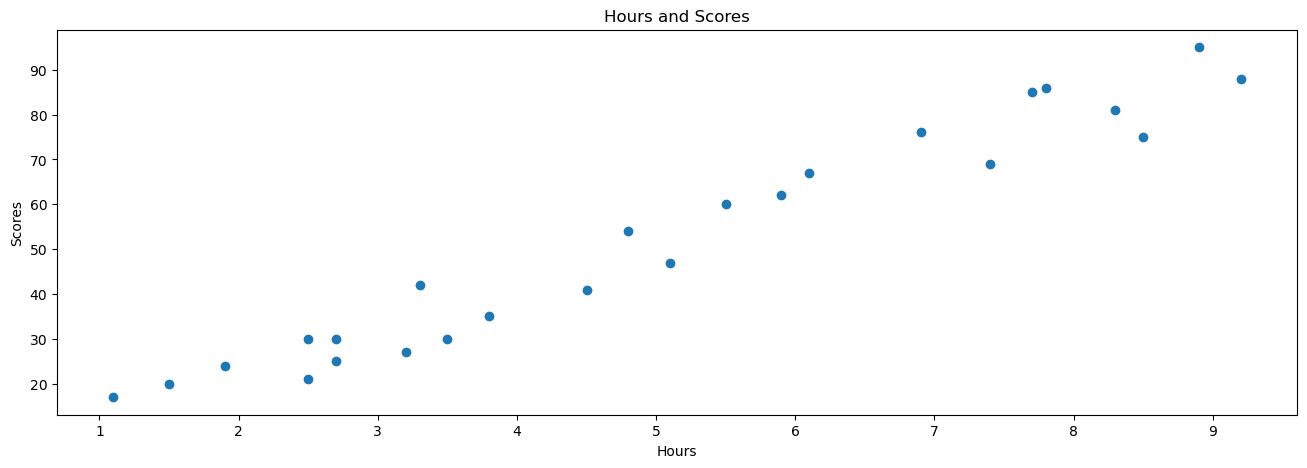

In [9]:
plt.figure(figsize=(16,5))
plt.title('Hours and Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.scatter(df.Hours, df.Scores)

plt.show()

Based on the graph above, it can be seen that study hours and student grades are **directly proportional**, which means that the longer a student studies, the higher the grade he will get. This proves that there is a **strong influence** of study hours on student scores.



## Feature Engineering

We using the plot to see the distribution of hours data.

<AxesSubplot:xlabel='Hours', ylabel='Density'>

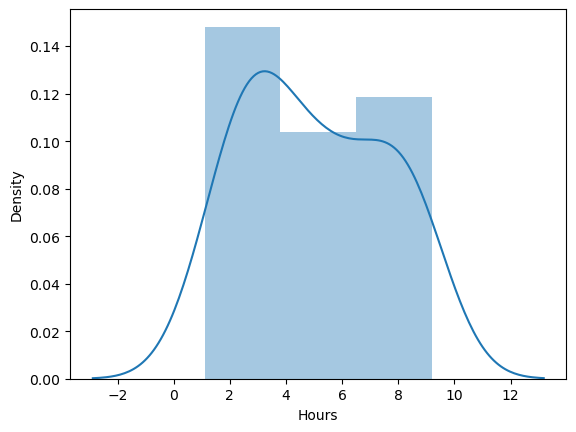

In [10]:
sns.distplot(df['Hours']) 

we check mean, median, and mode of the data.

In [11]:
print(df['Hours'].mean())
print(df['Hours'].median())
print(df['Hours'].mode().values[0])

5.012
4.8
2.5


Because these columns have a nearly normal distribution, they do not need to be scaled.

We using the plot to see the distribution of scores data.

<AxesSubplot:xlabel='Scores', ylabel='Density'>

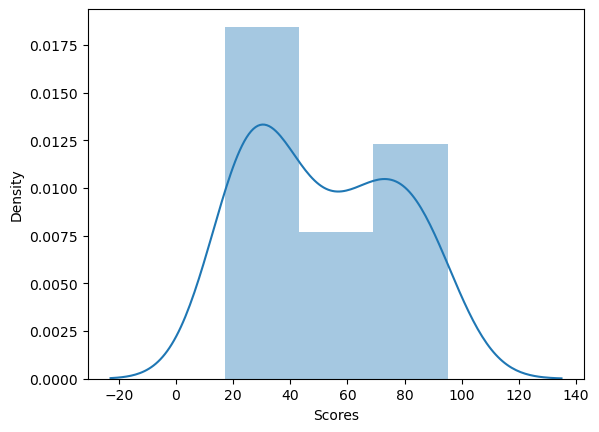

In [12]:
sns.distplot(df['Scores']) 

we check mean, median, and mode of the data.

In [13]:
print(df['Scores'].mean())
print(df['Scores'].median())
print(df['Scores'].mode().values[0])

51.48
47.0
30


Because these columns have a nearly normal distribution, they do not need to be scaled.

## Preprosesing Modeling

We define X and y.

In [14]:
X = df.drop(["Scores"], axis = 1)
y = df["Scores"]

and then, we split the train and test data with a test size of 1/3 of the total data.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=1/3, random_state=42)

Get shape of the train and test data to know how many rows and columns we use.

In [16]:
print("X test Shape:",X_test.shape)
print("y test Shape:",y_test.shape)
print("X train Shape:",X_train.shape)
print("y train Shape:",y_train.shape)

X test Shape: (17, 1)
y test Shape: (17,)
X train Shape: (8, 1)
y train Shape: (8,)


## Modeling

We use Linear Regression as model.

In [17]:
regressor = LinearRegression()

And then we fit X train and y train into the model.

In [18]:
regressor.fit(X_train,y_train)

LinearRegression()

We predict X test and assign in to y pred variable.

In [19]:
y_pred = regressor.predict(X_test)

We show the comparison between actual data and prediction data.

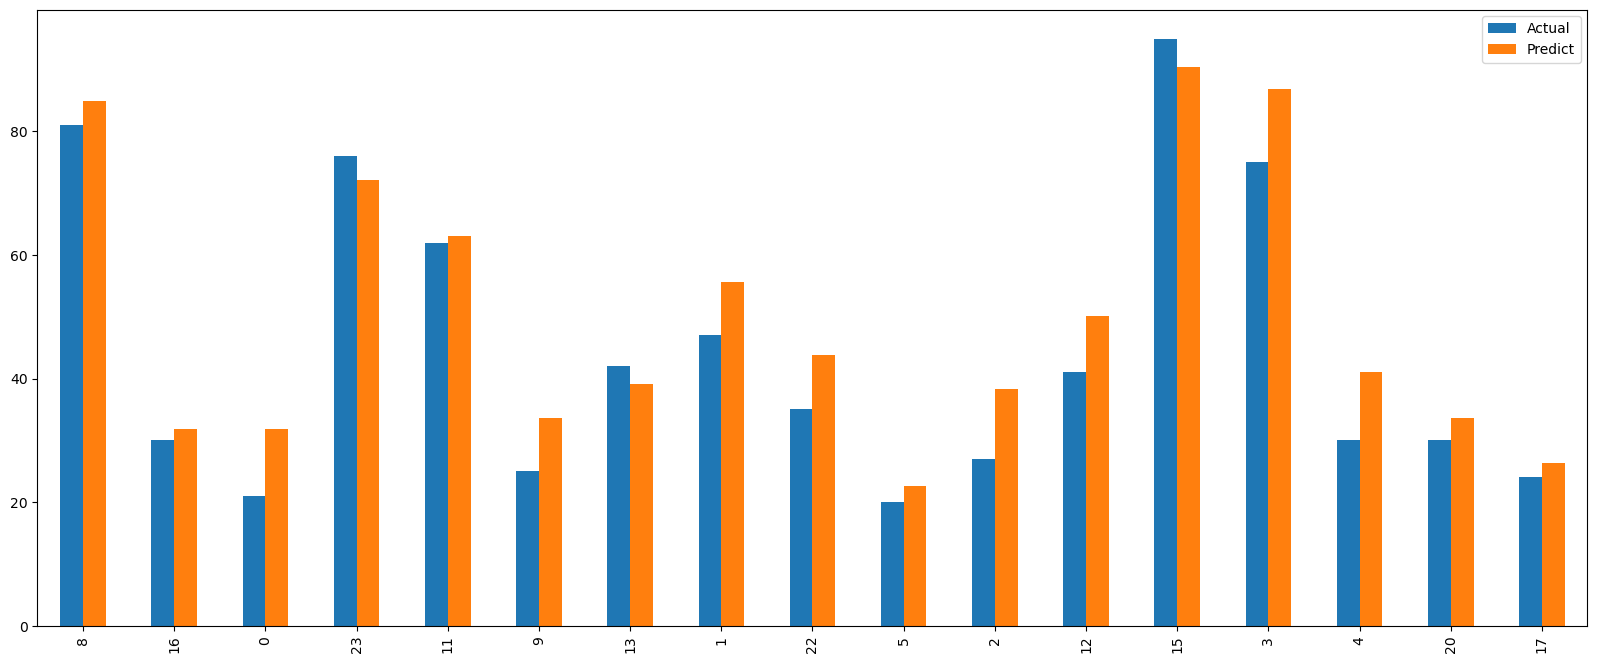

In [20]:
result = pd.DataFrame({"Actual":y_test,"Predict":y_pred})
result.plot(kind="bar",figsize=(20,8))
plt.show()

We show another scatter plot to see if the predicted results are close to the actual data.

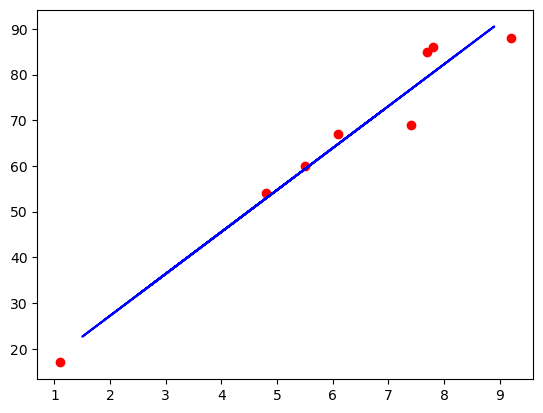

In [21]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_test.values, y_pred, color = 'blue')
plt.show()

Based on the graph above, the red dot has a position close to the line, therefore the prediction results have a value that is close to the actual value.

## Evaluate Modeling

**Root Mean Squared Error (RMSE)** is the square root of the mean squared error between the predicted and actual values.

In [22]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

rmse

7.291891275897982

In [23]:
rmseN = rmse/(y.max()-y.min())

In [24]:
rmseN

0.09348578558843568

With an **RMSE** of 7.29/0.09 we have a pretty decent model. because in order for us to know how good our model is, if we look at the RMSE value, we will normalize the RMSE with the distance we want to predict, and it can be seen if the result is closer to 0 than to 1, which means that a value closer to 0 represents a better fitting model.

**Mean Absolute Error** calculates the average difference between the calculated values and actual values.

In [25]:
mae = mean_absolute_error(y_test, y_pred)

mae

6.27880630751843

The **MAE** value obtained is 6.27, meaning that the average absolute difference between the actual value and the predicted value is 6.27 and is still relatively good.

**MAPE** is a percentage error metric where the value corresponds to the average amount of error that predictions have. 

In [26]:
mape = mean_absolute_percentage_error(y_test, y_pred)

mape

0.1825039540911246

**MAPE value of 18% means it's low, but acceptable accuracy**. A MAPE less than 5% is considered as an indication that the forecast is acceptably accurate. A MAPE greater than 10% but less than 25% indicates low, but acceptable accuracy.

Coefficient of determination also called as **R2** score is used to evaluate the performance of a linear regression model. 

In [27]:
r2 = r2_score(y_test, y_pred)

r2

0.9008323972503134

**0.90 value of r2 score means a strong correlation**. The higher the R-Squared value the better. An R-squared value of above 0.75 (which is our r-squared score is 0.90) would be considered a strong correlation.

# Deployment

we use mlflow to deploy the model to the localhost.

In [28]:
# import lib
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

import warnings
warnings.filterwarnings('ignore')

from urllib.parse import urlparse

import mlflow
import mlflow.sklearn

import logging

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

if __name__ == "__main__":
    warnings.filterwarnings("ignore")
    np.random.seed(40)

# load dataset
df = pd.read_csv('score.csv')

# preprosessing modeling

X = df.drop(["Scores"], axis = 1)
y = df["Scores"]

# split 

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=1/3, random_state=42)

# eval metrics

def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mape = mean_absolute_percentage_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, mape, r2

# modeling

with mlflow.start_run():
        lr = LinearRegression()
        lr.fit(X_train, y_train)

        y_pred = lr.predict(X_test)

        (rmse, mae, mape, r2) = eval_metrics(y_test, y_pred)

        print("  RMSE: %s" % rmse)
        print("  MAE: %s" % mae)
        print("  MAPE: %s" % mape)
        print("  R2: %s" % r2)


        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("mae", mae)
        mlflow.log_metric("mape", mape)
        mlflow.log_metric("r2", r2)
    

        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        if tracking_url_type_store != "file":
            mlflow.sklearn.log_model(lr, "model", registered_model_name="Linear Regression")
        else:
            mlflow.sklearn.log_model(lr, "model")

  RMSE: 7.291891275897982
  MAE: 6.27880630751843
  MAPE: 0.1825039540911246
  R2: 0.9008323972503134


# Result



Based on the graph above, study hours and student scores are directly proportional, which means that the longer a student studies, the higher the score he will get. This proves that there is a strong relationship between study hours and student scores.

In this dataset, it can be described that there are 25 study hours data with an average of 5.01. The minimum study hours is 1.1 and the maximum is 9.2, also there are 25 student scored data with an average of 51.4. The minimum student score is 17 and the maximum is 95.

**RMSE value obtained is 7.29** with the **normalized RMSE value being 0.09** and it can be seen that the result is closer to 0 than 1, which means that a value closer to 0 indicates a **more suitable model**. The **MAE** value is 6.27, which means that the average predicted value will decrease by 6.27 and if you look at the range of data we want to predict, it is between 14-97 which has changed slightly. The **MAPE value obtained is 18%**, which means that the **accuracy is acceptable even though it is low** because MAPE is greater than 10% but less than 25% indicates low but acceptable accuracy. The **R2 value obtained is 0.**9 which means it has a **strong correlation** because in general, the higher the R2, the better the model fits your data.

# Recommendation



**Students with low scores are advised to study longer** than usual so that their grades are higher considering there is a strong relationship between study hours and student scores. Meanwhile, **students with high scores are also advised to study harder** in order to get higher scores or maintain their scores.

Since the average student studying for 5 hours gets a score of 51, students who only study for 5 hours are advised to increase their study time in order to get a good grade. Students who study for 7.4 hours are only able to get a score of 75 which means students also have to study for more than 7.4 hours so that their grades are better.

# Deployment Result

**MLflow** is an open source framework that makes it easy to track the machine learning model that was trained and the parameters, data, and metrics associated with that model.

**MLflow model tracking** can train different machine learning models and then make predictions with them in turn using a standard model prediction interface. In addition, MLflow model tracking can also register models in the MLflow model registry and track which models are used in production so that this information is easily accessible to everyone who works with those models.

Based on the MLflow model tracking, the **RMSE value obtained is 7.29** with the **normalized RMSE value being 0.09** and it can be seen that the result is closer to 0 than 1, which means that a value closer to 0 indicates a **more suitable model**. The **MAE value obtained is 6.27**, meaning that the average absolute difference between the actual value and the predicted value is 6.27 and is still **relatively good**. The **MAPE value obtained is 18%**, which means that the **accuracy is acceptable even though it is low** because MAPE is greater than 10% but less than 25% indicates low but acceptable accuracy. The **R2 value obtained is 0.**9 which means it has a **strong correlation** because in general, the higher the R2, the better the model fits your data.